In [1]:
# 서울에서 전라남도, 경상남도, 충청남도, 경기도로
# 전출간 인원을 막대그래프로 비교
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('../data/시도_별_이동자수.xlsx', header=0, fillna=0)
print(df.head())

전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2   NaN  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3   NaN  부산광역시    448577    389797    362202    482061    680984    805979   
4   NaN  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2010      2011      2012      2013      2014  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8226594   8127195   7506691   7411784   7629098   
2   2756510   2893403  ...   1733015   1721748   1555281   1520090   1573594   
3    724664    785117  ...    519334    508043    461042    478451    485710   
4         -         -  ...    370817    370563    348642    351873    350213   

       2015      2016      2017      2018      2019  

In [2]:
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(
        fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [3]:
# NaN 값들을 이전 값으로 채우기
df = df.fillna(method='ffill')
print(df.head())

전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2    전국  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3    전국  부산광역시    448577    389797    362202    482061    680984    805979   
4    전국  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2010      2011      2012      2013      2014  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8226594   8127195   7506691   7411784   7629098   
2   2756510   2893403  ...   1733015   1721748   1555281   1520090   1573594   
3    724664    785117  ...    519334    508043    461042    478451    485710   
4         -         -  ...    370817    370563    348642    351873    350213   

       2015      2016      2017      2018      2019  

In [4]:
# 전출지별이 서울특별시 이고, 전입지별이 서울특별시가 아닌것
# 마스킹 처리 한다고함.
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != "서울특별시")
# mask의 결과가 True인것만 추출
df_seoul = df[mask]
print(df_seoul.head())

전출지별   전입지별     1970     1971     1972     1973     1974     1975  \
19  서울특별시     전국  1448985  1419016  1210559  1647268  1819660  2937093   
21  서울특별시  부산광역시    11568    11130    11768    16307    22220    27515   
22  서울특별시  대구광역시        -        -        -        -        -        -   
23  서울특별시  인천광역시        -        -        -        -        -        -   
24  서울특별시  광주광역시        -        -        -        -        -        -   

       1976     1977  ...     2010     2011     2012     2013     2014  \
19  2495620  2678007  ...  1848038  1834806  1658928  1620640  1661425   
21    23732    27213  ...    17418    18816    16135    16153    17320   
22        -        -  ...    10277    10397    10135    10631    10062   
23        -        -  ...    46082    51641    49640    47424    43212   
24        -        -  ...    11095    10587    10154     9129     9759   

       2015     2016     2017     2018     2019  
19  1726687  1655859  1571423  1549937  1476081  
21    17009    

In [5]:
# 불필요한 열 제거
df_seoul.drop(['전출지별'], axis=1, inplace=True)
print(df_seoul.head())

전입지별     1970     1971     1972     1973     1974     1975     1976  \
19     전국  1448985  1419016  1210559  1647268  1819660  2937093  2495620   
21  부산광역시    11568    11130    11768    16307    22220    27515    23732   
22  대구광역시        -        -        -        -        -        -        -   
23  인천광역시        -        -        -        -        -        -        -   
24  광주광역시        -        -        -        -        -        -        -   

       1977     1978  ...     2010     2011     2012     2013     2014  \
19  2678007  3028911  ...  1848038  1834806  1658928  1620640  1661425   
21    27213    29856  ...    17418    18816    16135    16153    17320   
22        -        -  ...    10277    10397    10135    10631    10062   
23        -        -  ...    46082    51641    49640    47424    43212   
24        -        -  ...    11095    10587    10154     9129     9759   

       2015     2016     2017     2018     2019  
19  1726687  1655859  1571423  1549937  1476081  
21 

In [6]:
# 불필요한 행 제거 - 인덱스 설정을 안 한 경우는 일련번호로 제거
# df_seoul.drop([0, 1, 2, 3, 4, 5], inplace=True)

# 기존 컬럼을 인덱스로 설정
df_seoul.set_index(['전입지별'], inplace=True)
print(df_seoul.head())

1970     1971     1972     1973     1974     1975     1976     1977  \
전입지별                                                                            
전국     1448985  1419016  1210559  1647268  1819660  2937093  2495620  2678007   
부산광역시    11568    11130    11768    16307    22220    27515    23732    27213   
대구광역시        -        -        -        -        -        -        -        -   
인천광역시        -        -        -        -        -        -        -        -   
광주광역시        -        -        -        -        -        -        -        -   

          1978     1979  ...     2010     2011     2012     2013     2014  \
전입지별                     ...                                                
전국     3028911  2441242  ...  1848038  1834806  1658928  1620640  1661425   
부산광역시    29856    28542  ...    17418    18816    16135    16153    17320   
대구광역시        -        -  ...    10277    10397    10135    10631    10062   
인천광역시        -        -  ...    46082    51641    49640  

In [7]:
# 행단위로 골라내기 - 인덱스를 이용
sr = df_seoul.loc[['경기도', '충청남도', '경상남도', '전라북도']]
print(sr)

1970    1971   1972    1973    1974    1975    1976    1977    1978  \
전입지별                                                                          
경기도   130149  150313  93333  143234  149045  253705  202276  207722  237684   
충청남도   15954   18943  23406   27139   25509   51205   41447   43993   48091   
경상남도    8409   10001  11263   15193   16771   23150   22400   27393   28697   
전라북도   10814   13192  16583   18642   16647   34411   29835   28444   29676   

        1979  ...    2010    2011    2012    2013    2014    2015    2016  \
전입지별          ...                                                           
경기도   278411  ...  410735  373771  354135  340801  332785  359337  370760   
충청남도   45388  ...   24522   24723   22269   21486   21473   22299   21741   
경상남도   30183  ...   15689   16039   14474   14447   14799   15220   13717   
전라북도   31570  ...   17569   17755   16120   14909   14566   14835   13835   

        2017    2018    2019  
전입지별                          
경기도   34

In [8]:
# 행과 열을 치환
sr = sr.T
print(sr)

전입지별     경기도   충청남도   경상남도   전라북도
1970  130149  15954   8409  10814
1971  150313  18943  10001  13192
1972   93333  23406  11263  16583
1973  143234  27139  15193  18642
1974  149045  25509  16771  16647
1975  253705  51205  23150  34411
1976  202276  41447  22400  29835
1977  207722  43993  27393  28444
1978  237684  48091  28697  29676
1979  278411  45388  30183  31570
1980  297539  54480  29205  39396
1981  252073  51369  28795  39745
1982  320174  48834  28250  37169
1983  400875  55344  30485  39175
1984  352238  50318  27988  33460
1985  390265  49520  25792  34147
1986  412535  47888  26002  33661
1987  405220  48678  26970  34039
1988  415174  49038  26801  36159
1989  412933  31707  24189  30538
1990  473889  29993  24216  32144
1991  384714  28211  21999  26421
1992  428344  26600  21546  26220
1993  502584  25958  19398  24661
1994  542204  22293  17887  21939
1995  599411  26501  19306  23837
1996  520566  27159  19061  23078
1997  495454  27395  12855  22032
1998  407050  

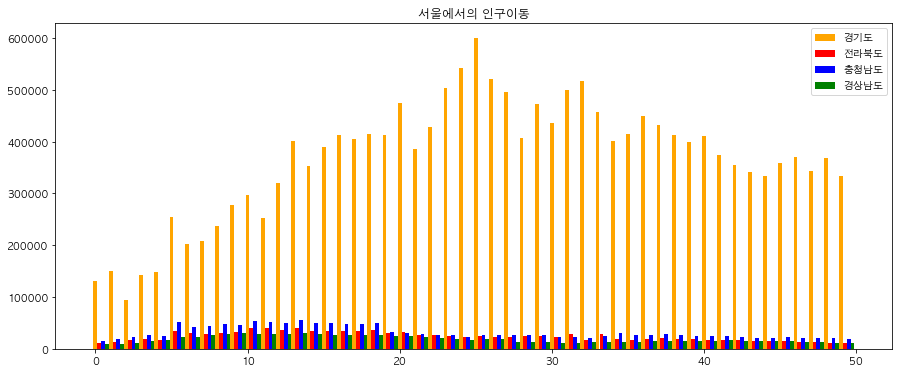

In [9]:
# 데이터 모임에 동일한 함수를 적용한 후 결과 만들기
# sr.index에 int 라는 함수를 각 요소마다 대입해서 실행한 후 그 결과를 가지고 다시 데이터의 모임을 생성
sr.index = sr.index.map(int)

# 그래프 그리기
plt.figure(figsize=(15, 6))

plt.bar(pd.RangeIndex(0, len(sr.index), 1), sr['경기도'], color='orange', width=0.25, label='경기도')
plt.bar(pd.RangeIndex(0, len(sr.index), 1)+0.25, sr['전라북도'], color='red', width=0.25, label='전라북도')
plt.bar(pd.RangeIndex(0, len(sr.index), 1)+0.5, sr['충청남도'], color='blue', width=0.25, label='충청남도')
plt.bar(pd.RangeIndex(0, len(sr.index), 1)+0.75, sr['경상남도'], color='green', width=0.25, label='경상남도')

# 범례 표시
plt.legend()

plt.title('서울에서의 인구이동')
plt.show()